<a href="https://colab.research.google.com/github/greeningstone/0_mini/blob/master/%EC%BD%94%EB%A1%9C%EB%82%98%EC%8A%A4%ED%8F%AC%EC%B8%A0%ED%99%9C%EB%8F%99_Wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 모듈 설치

In [6]:
# 코랩설치
!sudo apt-get install g++ openjdk-7-jdk # Install Java 1.7+
!sudo apt-get install python-dev; pip install konlpy     # Python 2.x
!sudo apt-get install python3-dev; pip3 install konlpy   # Python 3.x
!sudo apt-get install curl
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Package openjdk-7-jdk is not available, but is referred to by another package.
This may mean that the package is missing, has been obsoleted, or
is only available from another source

E: Package 'openjdk-7-jdk' has no installation candidate
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-dev is already the newest version (2.7.15~rc1-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
     |████████████████████████████████| 19.4MB 1.3MB/s 
     |████████████████████████████████| 3.8MB 39.6MB/s 
     |████████████████████████████████| 92kB 8.8MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6

In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [24]:
search = '코로나스포츠활동'
title_list = []

In [25]:
def crawler(start,end):
  while 1:

    if start>end:
      break

    url ='https://search.naver.com/search.naver?&where=news&query={}&sm=tab_pge&sort=0&photo=0&field=0&reporter_article=&pd=3&ds=2020.08.30&de=2020.09.11&docid=&nso=so:r,p:from20200830to20200911,a:all&mynews=0&cluster_rank=432&start={}&refresh_start=0'.format(search)
    req= requests.get(url)

    html= req.text
    soup = BeautifulSoup(html, 'html.parser')

    titles = soup.select('ul.type01 > li > dl > dt > a')
    
    for title in titles:
      title_list.append(title['title'])
    start +=100
    
    print(titles)

In [27]:
crawler(1,100)

IndexError: ignored

In [16]:
import requests
from bs4 import BeautifulSoup
import re
url = 'https://search.naver.com/search.naver?&where=news&query={}&sm=tab_pge&sort=0&photo=0&field=0&reporter_article=&pd=3&ds=2020.08.30&de=2020.09.11&docid=&nso=so:r,p:from20200830to20200911,a:all&mynews=0&cluster_rank=432&start={}&refresh_start=0'
keyword = '코로나스포츠활동'
for i in range(1, 100, 10): # max 400page >> 4000
    URL = url.format(keyword,i)
    print(URL)
    resp = requests.get(URL)
    soup = BeautifulSoup(resp.content,'html.parser')
    li_tag = soup.find('ul',class_='type01').find_all('li')
    for j in li_tag:
        try:
            naver_news = j.find('dl').find('dd',class_='txt_inline').find('a').text
            if naver_news =='네이버뉴스':
                news_url = j.find('dl').find('dd',class_='txt_inline').find('a')['href']
                detail_resp = requests.get(news_url)
                detail_soup = BeautifulSoup(detail_resp.content,'html.parser')
                date = detail_soup.find('span',class_='t11').text[:10]
                title = detail_soup.find('div',class_='content').find('h3').text.strip()

                content = detail_soup.find('div',class_='_article_body_contents').text.strip()
                content = re.sub('\/\/ flash 오류를 우회하기 위한 함수 추가\nfunction _flash_removeCallback\(\) \{\}','',content).strip()

        except:
            pass
import pandas as pd
df = pd.DataFrame()
df['date'] = date_ls
df['title'] = title_ls
df['content'] = content_ls
df.head()

https://search.naver.com/search.naver?&where=news&query=코로나스포츠활동&sm=tab_pge&sort=0&photo=0&field=0&reporter_article=&pd=3&ds=2020.08.30&de=2020.09.11&docid=&nso=so:r,p:from20200830to20200911,a:all&mynews=0&cluster_rank=432&start=1&refresh_start=0
https://search.naver.com/search.naver?&where=news&query=코로나스포츠활동&sm=tab_pge&sort=0&photo=0&field=0&reporter_article=&pd=3&ds=2020.08.30&de=2020.09.11&docid=&nso=so:r,p:from20200830to20200911,a:all&mynews=0&cluster_rank=432&start=11&refresh_start=0
https://search.naver.com/search.naver?&where=news&query=코로나스포츠활동&sm=tab_pge&sort=0&photo=0&field=0&reporter_article=&pd=3&ds=2020.08.30&de=2020.09.11&docid=&nso=so:r,p:from20200830to20200911,a:all&mynews=0&cluster_rank=432&start=21&refresh_start=0
https://search.naver.com/search.naver?&where=news&query=코로나스포츠활동&sm=tab_pge&sort=0&photo=0&field=0&reporter_article=&pd=3&ds=2020.08.30&de=2020.09.11&docid=&nso=so:r,p:from20200830to20200911,a:all&mynews=0&cluster_rank=432&start=31&refresh_start=0
https://s

NameError: ignored

In [8]:
from konlpy.tag import Mecab
m = Mecab()
m.nouns('메캡이 잘 실행 될까요?')

['메', '캡', '실행']

In [30]:

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from konlpy.tag import Twitter
from collections import Counter
from wordcloud import WordCloud

from bs4 import BeautifulSoup
import requests

In [28]:
word_list = content

In [32]:
from konlpy.tag import Twitter
twitte = Twitter()

/usr/local/lib/python3.6/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [33]:
sentences_tag = []

for sentence in word_list:
  morph = twitte.pos(sentence)
  sentences_tag.append(morph)

print(morph)

[('>', 'Punctuation')]


In [34]:
noun_list = []
for sentence in sentences_tag:
  for word, tag in sentence:
    if tag in ['Noun']:
      noun_list.append(word)

In [35]:
len(noun_list)

noun_list = [n for n in noun_list if len(n) >1]
noun_list[:100]

[]

In [36]:
counts = Counter(noun_list)
tags = counts.most_common(30)
tags

[]

In [37]:
en(noun_list)

noun_list = [n for n in noun_list if len(n) >1]
noun_list[:100]

NameError: ignored

# 다시 시작

In [38]:
from konlpy.tag import Okt
from collections import Counter
import csv

In [73]:
filename = "/content/drive/My Drive/Colab Notebooks/corono_sports_t.txt"
f = open(filename, 'r', encoding='UTF8')
news = f.read()

In [45]:
okt = Okt()
noun = okt.nouns(news)
for i, v in enumerate(noun):
    if len(v)<2:
        noun.pop(i)
        
count = Counter(noun)
f.close()

In [46]:
noun_list = count.most_common(100)
for v in noun_list:
    print(v)

('코로나', 771)
('지원', 606)
('스포츠', 424)
('고용', 377)
('정부', 340)
('지급', 331)
('원금', 315)
('매출', 311)
('확산', 302)
('대상', 266)
('활동', 265)
('판매', 243)
('감소', 237)
('기자', 230)
('게임', 217)
('증가', 210)
('금지', 208)
('단계', 208)
('경제', 201)
('한국', 199)
('소득', 197)
('사회', 195)
('지난', 189)
('생활', 188)
('관련', 187)
('업자', 187)
('자영', 186)
('이번', 175)
('서울', 174)
('대한', 170)
('거리', 168)
('확대', 168)
('경우', 166)
('긴급', 165)
('시장', 162)
('여성', 161)
('대표', 158)
('최근', 157)
('뉴스', 156)
('위해', 153)
('피해', 152)
('통해', 150)
('계층', 143)
('소비', 143)
('두기', 143)
('운동', 141)
('골프', 141)
('사람', 139)
('기준', 138)
('대비', 136)
('상품', 135)
('참여', 134)
('배포', 133)
('우리', 131)
('무단', 131)
('기업', 130)
('프로그램', 130)
('상황', 130)
('최대', 129)
('진행', 126)
('실내', 126)
('체육', 125)
('때문', 124)
('노동자', 122)
('이상', 118)
('시설', 117)
('세계', 116)
('생각', 115)
('이후', 115)
('것', 113)
('프리랜서', 113)
('출시', 112)
('올해', 111)
('취약', 111)
('공인', 111)
('방역', 110)
('소상', 109)
('및', 108)
('네이버', 108)
('안정', 107)
('상공', 107)
('사업', 107)
('국내', 106

In [67]:
with open('noun_list.txt','w', encoding='UTF8') as f:
    for v in noun_list:
        f.write(" ".join(map(str,v))) # 튜플 int 값을 str 타입으로 전환 후 조인
        f.write("\n")

In [58]:
!pip install wordcloud

In [68]:
from wordcloud import WordCloud

In [69]:
import sys

{'코로나': 771, '지원': 606, '스포츠': 424, '고용': 377, '정부': 340, '지급': 331, '원금': 315, '매출': 311, '확산': 302, '대상': 266, '활동': 265, '판매': 243, '감소': 237, '기자': 230, '게임': 217, '증가': 210, '금지': 208, '단계': 208, '경제': 201, '한국': 199, '소득': 197, '사회': 195, '지난': 189, '생활': 188, '관련': 187, '업자': 187, '자영': 186, '이번': 175, '서울': 174, '대한': 170, '거리': 168, '확대': 168, '경우': 166, '긴급': 165, '시장': 162, '여성': 161, '대표': 158, '최근': 157, '뉴스': 156, '위해': 153, '피해': 152, '통해': 150, '계층': 143, '소비': 143, '두기': 143, '운동': 141, '골프': 141, '사람': 139, '기준': 138, '대비': 136, '상품': 135, '참여': 134, '배포': 133, '우리': 131, '무단': 131, '기업': 130, '프로그램': 130, '상황': 130, '최대': 129, '진행': 126, '실내': 126, '체육': 125, '때문': 124, '노동자': 122, '이상': 118, '시설': 117, '세계': 116, '생각': 115, '이후': 115, '것': 113, '프리랜서': 113, '출시': 112, '올해': 111, '취약': 111, '공인': 111, '방역': 110, '소상': 109, '및': 108, '네이버': 108, '안정': 107, '상공': 107, '사업': 107, '국내': 106, '오후': 106, '기본소득': 106, '선수': 104, '카약': 104, '추경': 103, '수요': 101, '구독': 100, '

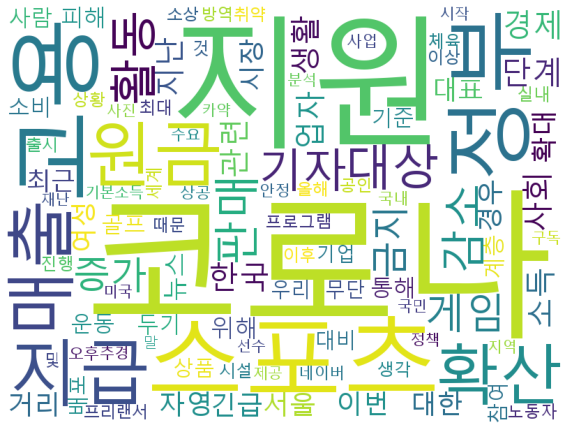

In [86]:
wordcloud= WordCloud(font_path='/content/drive/My Drive/Colab Notebooks/malgun.ttf',
                     background_color='white', width=800, height=600)
print(dict(noun_list))

wordcloud.generate_from_frequencies(dict(noun_list))
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [55]:
!pip install IPython